In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_excel('Flight_Price/Data_Train.xlsx')

In [3]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.dropna(inplace=True)

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
def change_to_date(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [9]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_date(i)

In [10]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-08 05:50:00,2021-05-08 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-08 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-08 18:05:00,2021-05-08 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-08 16:50:00,2021-05-08 21:35:00,4h 45m,1 stop,No info,13302


In [12]:
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

In [13]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-08 05:50:00,2021-05-08 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [14]:
train_data.drop('Date_of_Journey', inplace=True, axis=1)

In [15]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-08 05:50:00,2021-05-08 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [16]:
def extract_hour(df, col):
    df[col+'_hour'] = df[col].dt.hour
    
def extract_min(df, col):
    df[col+'_min'] = df[col].dt.minute
    
def drop(df, col):
    df.drop(col, axis=1, inplace=True)

In [17]:
extract_hour(train_data, 'Arrival_Time')
extract_min(train_data, 'Arrival_Time')
drop(train_data, 'Arrival_Time')

In [18]:
train_data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-08 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-08 05:50:00,7h 25m,2 stops,No info,7662,5,1,13,15


In [19]:
extract_hour(train_data, 'Dep_Time')
extract_min(train_data, 'Dep_Time')
drop(train_data, 'Dep_Time')

In [20]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50


In [21]:
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i]+ ' 0m'
        else:
            duration[i] = '0h ' +duration[i]
            

In [22]:
train_data['Duration']= duration

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [24]:
def hour(x):
    return x.split(' ')[0][0:-1]

def min(x):
    return x.split(' ')[1][0:-1]

In [25]:
train_data['Duration_hour'] =train_data['Duration'].apply(hour) 
train_data['Duration_min'] = train_data['Duration'].apply(min)

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50,4,45


In [27]:
drop(train_data, 'Duration')

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,35,16,50,4,45


In [29]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Dep_Time_hour         int64
Dep_Time_min          int64
Duration_hour        object
Duration_min         object
dtype: object

In [30]:
train_data['Duration_hour'] = train_data['Duration_hour'].astype(int)
train_data['Duration_min'] = train_data['Duration_min'].astype(int)

In [31]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Dep_Time_hour         int64
Dep_Time_min          int64
Duration_hour         int32
Duration_min          int32
dtype: object

In [32]:
cat_data = [col for col in train_data.columns if train_data[col].dtype=='O']

In [33]:
cat_data

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [34]:
cont_data = [col for col in train_data.columns if train_data[col].dtype !='O']

In [35]:
cont_data

['Price',
 'Journey_day',
 'Journey_month',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Duration_hour',
 'Duration_min']

In [36]:
catogorical = train_data[cat_data]

In [37]:
catogorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [38]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

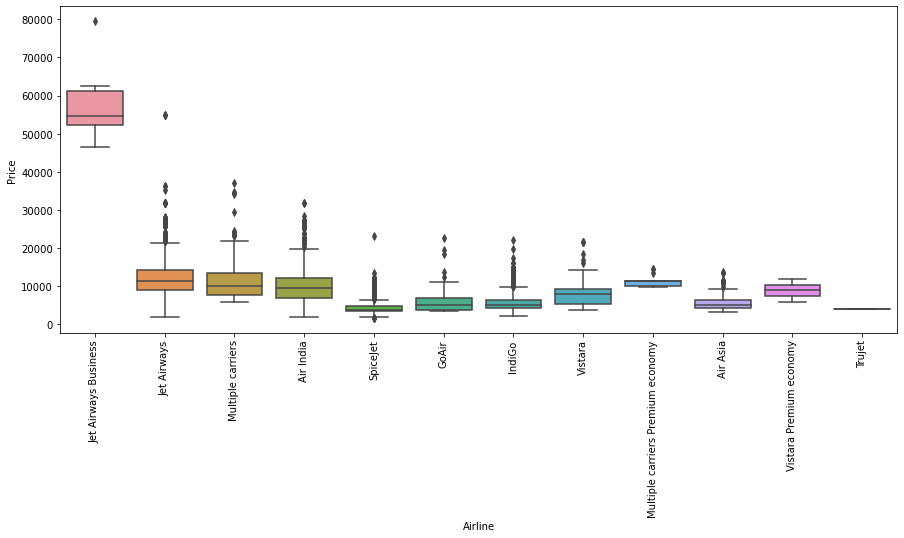

In [39]:
plt.figure(figsize = (15,6))
sns.boxplot(x='Airline', y = 'Price', data = train_data.sort_values(by = 'Price', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [40]:
Airline = pd.get_dummies(catogorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [41]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

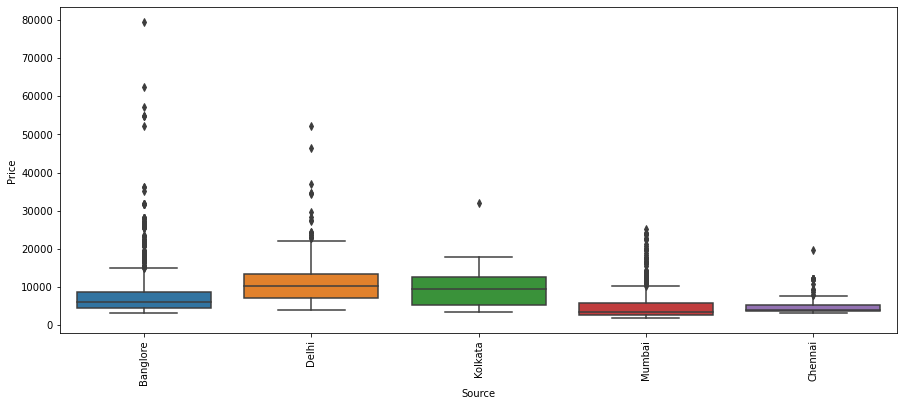

In [42]:
plt.figure(figsize = (15,6))
sns.boxplot(x='Source', y = 'Price', data = train_data.sort_values(by = 'Price', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [43]:
Source = pd.get_dummies(catogorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


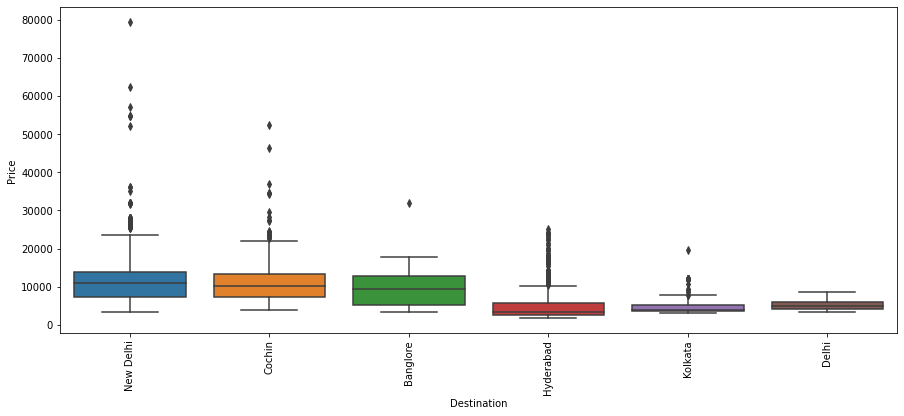

In [44]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Destination', y='Price', data=train_data.sort_values(by='Price', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [45]:
Destination = pd.get_dummies(catogorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [46]:
catogorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [47]:
catogorical['Route_1'] = catogorical['Route'].str.split('→').str[0]
catogorical['Route_2'] = catogorical['Route'].str.split('→').str[1]
catogorical['Route_3'] = catogorical['Route'].str.split('→').str[2]
catogorical['Route_4'] = catogorical['Route'].str.split('→').str[3]
catogorical['Route_5'] = catogorical['Route'].str.split('→').str[4]

<ipython-input-47-61c6889f4491>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catogorical['Route_1'] = catogorical['Route'].str.split('→').str[0]
<ipython-input-47-61c6889f4491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catogorical['Route_2'] = catogorical['Route'].str.split('→').str[1]
<ipython-input-47-61c6889f4491>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [48]:
catogorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [49]:
catogorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [50]:
catogorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [51]:
for i in ['Route_3', 'Route_4','Route_5']:
    catogorical[i].fillna('None', inplace=True)

C:\Users\ashut\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [52]:
catogorical.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [53]:
catogorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None


In [54]:
for i in catogorical.columns:
    print('{} has total {} categories'.format(i, len(catogorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Route has total 128 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
encoder = LabelEncoder()

In [57]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    catogorical[i] = encoder.fit_transform(catogorical[i])

<ipython-input-57-d6958c757a89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catogorical[i] = encoder.fit_transform(catogorical[i])


In [58]:
catogorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [59]:
drop(catogorical, 'Additional_Info')

C:\Users\ashut\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
catogorical.head()

,Airline,Source,Destination,Route,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,0,34,8,13,5


In [61]:
catogorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [62]:
total_stops_cat = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
   

In [63]:
catogorical['Total_Stops'] = catogorical['Total_Stops'].map(total_stops_cat)

<ipython-input-63-c3a57959e892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catogorical['Total_Stops'] = catogorical['Total_Stops'].map(total_stops_cat)


In [64]:
catogorical.head()

,Airline,Source,Destination,Route,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,0,34,8,13,5


In [65]:
train_data = pd.concat([catogorical, Airline, Source, Destination, train_data[cont_data]], axis=1)

In [66]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,...,New Delhi,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,0,13,29,13,5,...,1,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,2,25,1,3,5,...,0,7662,5,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,3,32,4,5,5,...,0,13882,6,9,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,2,34,3,13,5,...,0,6218,5,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,0,34,8,13,5,...,1,13302,3,1,21,35,16,50,4,45


In [67]:
drop(train_data, 'Airline')
drop(train_data, 'Source')
drop(train_data, 'Destination')

In [68]:
drop(train_data, 'Route')

In [69]:
train_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,1,10,22,20,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,13,15,5,50,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,4,25,9,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,23,30,18,5,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,21,35,16,50,4,45


In [70]:
pd.set_option('display.max_columns',None)
train_data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,1,10,22,20,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,13,15,5,50,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,4,25,9,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,23,30,18,5,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,21,35,16,50,4,45


In [71]:
def plot(df, col):
    fig, (axs1,axs2) = plt.subplots(2,1)
    sns.histplot(df[col], ax=axs1, kde=True)
    sns.boxplot(df[col], ax=axs2)

C:\Users\ashut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


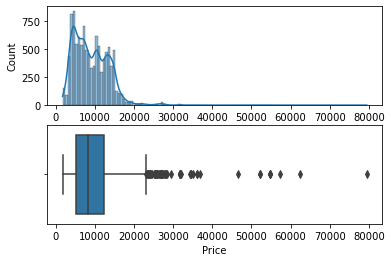

In [72]:
plot(train_data, 'Price')

In [73]:
train_data['Price'] = np.where(train_data['Price']>=40000, train_data['Price'].median(), train_data['Price'])

In [74]:
train_data['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

C:\Users\ashut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


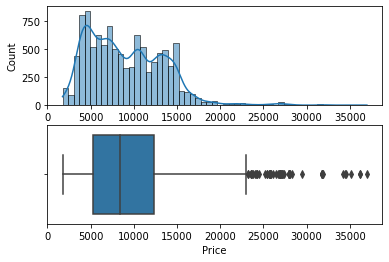

In [75]:
plot(train_data,'Price')

In [76]:
X = train_data.drop('Price', axis=1)
y = train_data['Price']

In [77]:
from sklearn.feature_selection import mutual_info_classif

In [78]:
mut_info_class = mutual_info_classif(X,y)

In [79]:
imp = pd.DataFrame(mut_info_class, index = X.columns)

In [80]:
imp.columns = ['Importance']
imp.sort_values(by = 'Importance', ascending=False)

,Importance
Route_2,2.781491
Route_3,2.306711
Total_Stops,2.139547
Route_1,2.035864
Arrival_Time_hour,1.862917
Duration_hour,1.789886
Arrival_Time_min,1.529128
Delhi,1.517821
Cochin,1.510033
Route_4,1.482892


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [83]:
from sklearn import metrics
import pickle
def predict(ml_model, dump):
    model = ml_model.fit(X_train, y_train)
    print('Training Score {}'.format(model.score(X_train, y_train)))
    prediction = model.predict(X_test)
    print('Predictions are {}'.format(prediction))
    r2_score = metrics.r2_score(y_test, prediction)
    print('r2 score {}'.format(r2_score))
    print('\n')
    
    print('MAE: ',metrics.mean_absolute_error(y_test, prediction))
    print('MSE: ',metrics.mean_squared_error(y_test, prediction))
    print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    print('\n')
    
    sns.distplot(y_test-prediction)
    
    if dump==1:
        fp = open('Flight_Price/model.pkl', 'wb')
        pickle.dump(model, fp)

In [84]:
from sklearn.ensemble import RandomForestRegressor

Training Score 0.954184714790878
Predictions are [ 3642.49       12712.705      10867.25066667 ...  2584.46
 11571.61        6088.52      ]
r2 score 0.8167359625855941


MAE:  1149.44808991631
MSE:  3591325.896933722
RMSE:  1895.0793906677688




C:\Users\ashut\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


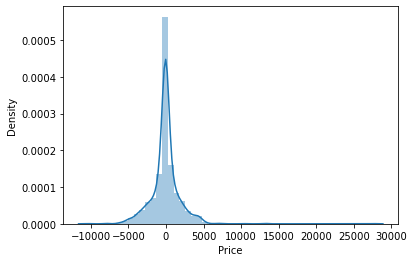

In [85]:
predict(RandomForestRegressor(), 1)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score 0.6158339579941574
Predictions are [ 2707.81429567 12051.29345443 11108.77246628 ...  3932.69992301
 10722.7976909   7592.71849431]
r2 score 0.6152563257729518


MAE:  1912.980689516912
MSE:  7539613.010972631
RMSE:  2745.8355760993104




C:\Users\ashut\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


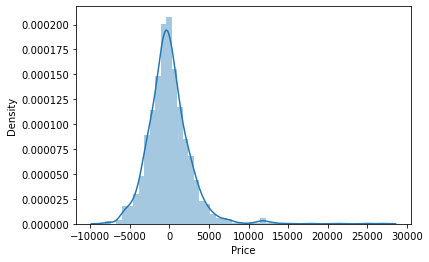

In [87]:
predict(LinearRegression(), 0)

Training Score 0.7828007276046889
Predictions are [ 3987.4 11665.  10567.6 ...  2995.  10796.6  6218. ]
r2 score 0.6419665048196916


MAE:  1712.1070659803463
MSE:  7016188.125896117
RMSE:  2648.808812635619




C:\Users\ashut\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


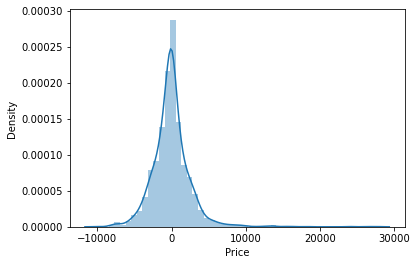

In [88]:
predict(KNeighborsRegressor(), 0)

Training Score 0.9679810102627255
Predictions are [ 3419. 13941. 12242. ...  2575. 10991.  5073.]
r2 score 0.7139458802125849


MAE:  1321.740227733583
MSE:  5605647.364376851
RMSE:  2367.6248360702866




C:\Users\ashut\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


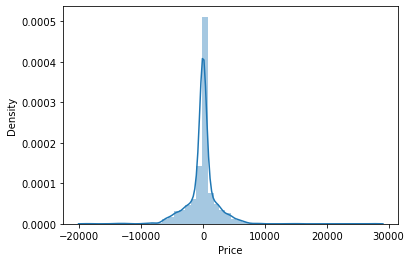

In [89]:
predict(DecisionTreeRegressor(), 0)

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
param_grid =[int(i) for i in np.linspace(start=100, stop=1200,num=6 )]
max_depth = [int(i) for i in np.linspace(start=5, stop=30,num=4 )]

In [94]:
random_grid = {
    'n_estimators':param_grid,
    'max_features':['auto', 'sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [97]:
rfr_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions = random_grid,
    verbose = 2,
    cv = 3, n_jobs=-1


)

In [98]:
rfr_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [103]:
predictions2 = rfr_random.predict(X_test)

In [104]:
predictions2

array([ 4008.4746945 , 12035.25048419,  9974.06163417, ...,
        2540.139615  , 12098.69677073,  6021.08794881])

In [105]:
print('r2_score', metrics.r2_score(y_test, predictions2))

r2_score 0.8463197265032908


C:\Users\ashut\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

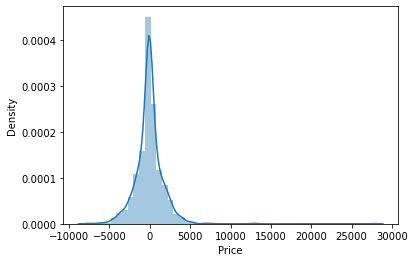

In [106]:
sns.distplot(y_test-predictions2)

In [107]:
 
    print('MAE: ',metrics.mean_absolute_error(y_test, predictions2))
    print('MSE: ',metrics.mean_squared_error(y_test, predictions2))
    print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE:  1113.8151644741447
MSE:  3011588.9284299067
RMSE:  1735.393018434126


In [108]:
from sklearn.model_selection import GridSearchCV

In [110]:
rfr_grid = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid = random_grid,
    verbose = 2,
    cv = 3, n_jobs=-1
)

In [111]:
rfr_grid.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 46.5min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 13, 21, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [5, 10, 15, 100],
                         'n_estimators': [100, 320, 540, 760, 980, 1200]},
             verbose=2)

In [113]:
predict = rfr_grid.predict(X_test)

In [114]:
print('r2_score ', metrics.r2_score(y_test, predict))

r2_score  0.8504308090781644


<AxesSubplot:xlabel='Price', ylabel='Density'>

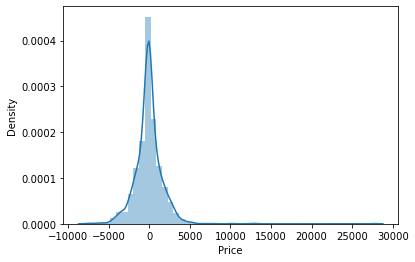

In [116]:
sns.distplot(y_test-predict)